In [51]:
# Importing libraries required for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt
import seaborn as sbn
from sklearn import svm

In [3]:
df = pd.read_csv("/Users/shivshankar/Downloads/Python For Data Analysis/Loan Prediction  Model Project/Dataset.csv")

In [4]:
df.head()    #To show first five rows of the DataSet

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()    #The columns with numeric data are returned only

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()            #Counting the null values in the data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
 df.shape   # Total number of rows and columns

(614, 16)

In [ ]:
#Fixing the null values (Removing them since mean cannot be added to non-numemric data)

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
Total Income         0
TotalIncome_log      0
dtype: int64

In [ ]:
# Changing the 'Y' and 'N' values to numeric (1 for Y, 0 for N) under Loan Status

In [25]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

/var/folders/97/tllmp3s11psc9dhpzk4fbl9h0000gn/T/ipykernel_30122/2065607977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log,Total Income,TotalIncome_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,9613.0,9.170872


In [31]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [ ]:
# We have to change 3+ because that is inappropriate 

In [30]:
df.replace({'Dependents':{'3+':4}}, inplace = True)

In [ ]:
# DATA VISUALISATION

In [ ]:
# 1. To check the chances of a graduate person of getting a loan

<Axes: xlabel='Education', ylabel='count'>

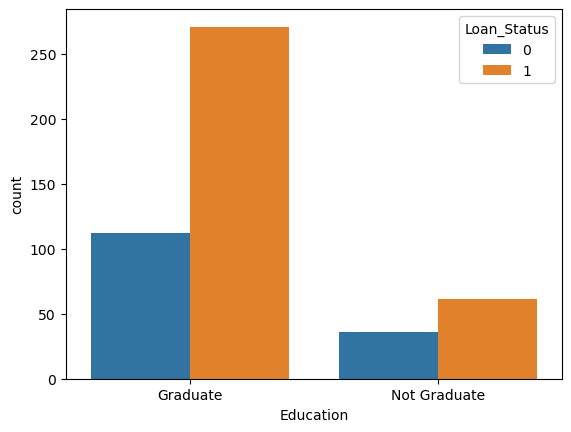

In [33]:
sbn.countplot(x = "Education", hue = "Loan_Status", data = df)

In [ ]:
# More graduates got a loan as seen by a bigger orange bar wrt to blue bar for graduates
# Whereas for non-graduate people the loan provided and not provided have minimum difference

In [ ]:
# 2. Checking loan status wrt marital status

<Axes: xlabel='Married', ylabel='count'>

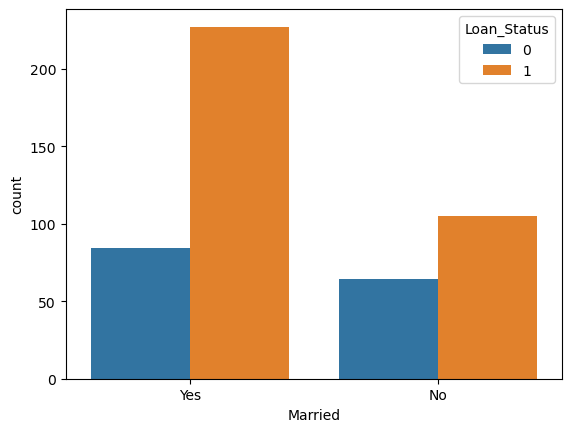

In [34]:
sbn.countplot(x = 'Married', hue = 'Loan_Status', data = df)

In [ ]:
# Graph shows that married loan applicants had higher chance of getting their loan approved 

In [ ]:
# Converting the columns with text data into numeric data for the model to understand it

In [39]:
df.replace({'Married':{'Yes':1, 'No':0},'Education':{'Graduate':1,'Not Graduate':0}}, inplace = True)

/var/folders/97/tllmp3s11psc9dhpzk4fbl9h0000gn/T/ipykernel_30122/886182217.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'Yes':1, 'No':0},'Education':{'Graduate':1,'Not Graduate':0}}, inplace = True)


In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log,Total Income,TotalIncome_log
1,LP001003,Male,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
5,LP001011,Male,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,9613.0,9.170872


In [41]:
df.replace({'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':1,'Urban':2},
           'Gender':{'Male':1,'Female':2}}, inplace = True)

/var/folders/97/tllmp3s11psc9dhpzk4fbl9h0000gn/T/ipykernel_30122/57389712.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':1,'Urban':2},


In [54]:
df.replace({'Property_Area':{'Semiurban':3}}, inplace = True)

/var/folders/97/tllmp3s11psc9dhpzk4fbl9h0000gn/T/ipykernel_30122/1411741002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Property_Area':{'Semiurban':3}}, inplace = True)


In [57]:
df.head() #All columns have numeric value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamount_log,Total Income,TotalIncome_log
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,5.587249,9613.0,9.170872


In [ ]:
# Separating the data and label (Loan_Status)

In [62]:
x = df.drop(columns = ['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       2        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       2        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# Splitting the data into Training data and test data

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, stratify = y, random_state = 2)

In [65]:
print(x.shape,x_test.shape,x_train.shape)

(480, 14) (48, 14) (432, 14)


In [ ]:
#  Training the machine - Support vector machine model (Since dataset it small)

In [66]:
classifier = svm.SVC(kernel = 'linear')

In [67]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# Model Evaluation - Finding Accuracy score

In [69]:
from sklearn.metrics import accuracy_score

In [68]:
x_train_prediction = classifier.predict(x_train)

In [70]:
train_accuracy = accuracy_score(x_train_prediction,y_train)

In [74]:
print('Accuracy on training data (in %):',train_accuracy*100)

Accuracy on training data (in %): 74.07407407407408


In [75]:
x_test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(x_test_prediction,y_test)

In [77]:
print('Accuracy on test data (in %):',test_accuracy*100)

Accuracy on test data (in %): 77.08333333333334


In [ ]:
# We get an accuracy of 77%.

In [ ]:
# Creating a predictive model

In [79]:
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,4.852030,6091.0,8.714568)

# Converting input data to numpy array
input_data_nmpy = np.asarray(input_data)

# Reshaping the data, since it is for one input scenario only
inpdat_reshape = input_data_nmpy.reshape(1,-1)

# Predicting for the scenario
prediction = classifier.predict(inpdat_reshape)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [84]:
if prediction == 1:
    print('Loan Approved')
else:
    print("Loan Not Approved")

Loan Not Approved


In [ ]:
# Thus, the model predicted that the loan for inpur scenario shall not be approved.